In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv(f'E:/Python_ML_projects/credit_risk_analysis/credit_risk_dataset.csv')

In [3]:
df = data.copy()

In [4]:
df.shape

(32581, 12)

Objective:

* Gain a better understanding of our data
* Develop an initial modeling strategy


### Checklist de base

##### Analysis of forme :
* Target variable: loan_status
* Rows and columns: 32,581 rows, 12 columns
* Variable types:
    float64: 3
    object: 4
    int64: 5
* Missing values analysis:
    Good news: There are not too many NaN values.
    - 9.5% missing in loan_int_rate
    - 2.74% missing in person_emp_length


##### Deep analysis

* target :
    - negative (0) 72% 
    - positive (1) 28% 
    

* about features :
   - 3 float variables (continuous variables): Their distributions do not follow a normal distribution.
    - int variables: Their distributions are quite unusual, especially for the person_income variable.
    - Qualitative variables: loan_intent has 5 distinct values, each roughly equally distributed. cb_person_default_on_file has only 2 types: Y and N.

* Relationship Between Variables and Target:

    - Target vs. Quantitative Variables: (I think it would be better to split the age variable into ranges and analyze it. Let’s keep this as an idea for now.)
    - Target vs. Qualitative Variables: For mortgage and rent, there are more 0s in the target. When cb_person_default is N, there are more 0s in the target.

* Relationship Between Features:

    - Relationship Between Quantitative Variables: loan_amount and loan_percent_income are highly correlated. person_age and cb_person_history_length also show a high correlation.
    - Relationship Between Qualitative Variables:
    


In [5]:
df.dtypes.value_counts()

int64      5
object     4
float64    3
Name: count, dtype: int64

<Axes: >

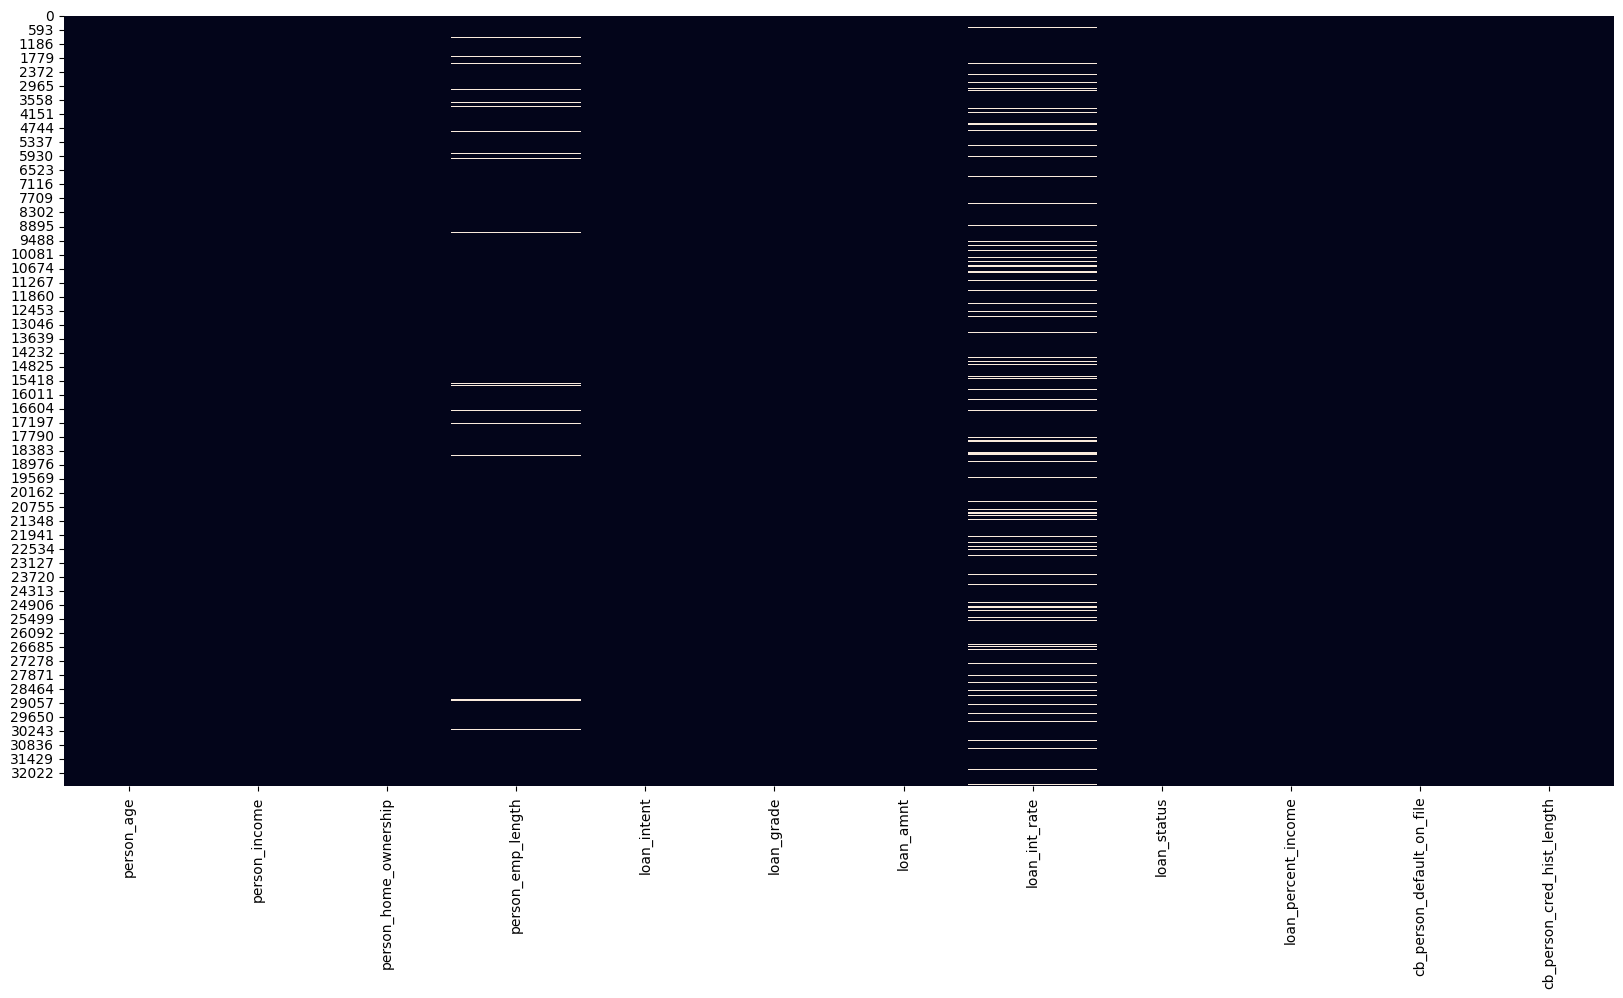

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar = False)

In [7]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
df.isna().sum()/df.shape[0]

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.027470
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 0.095639
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [9]:
df[df['loan_status'] == 0].duplicated().sum()

146

In [10]:
df.duplicated().sum() / df.shape[0]

0.00506430127988705

In [11]:

##df_0_unique = df[df['loan_status'] == 0].drop_duplicates()  # Supprime les doublons où loan_status == 0
#df_1 = df[df['loan_status'] == 1]  # Conserve toutes les lignes où loan_status == 1

#df_final = pd.concat([df_0_unique, df_1], ignore_index=True)

In [12]:
for col in df.columns:
    print(f"{col:} {df[col].nunique()}")

person_age 58
person_income 4295
person_home_ownership 4
person_emp_length 36
loan_intent 6
loan_grade 7
loan_amnt 753
loan_int_rate 348
loan_status 2
loan_percent_income 77
cb_person_default_on_file 2
cb_person_cred_hist_length 29


In [13]:
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [14]:
df['loan_status'].value_counts(normalize=True)

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64

<Axes: >

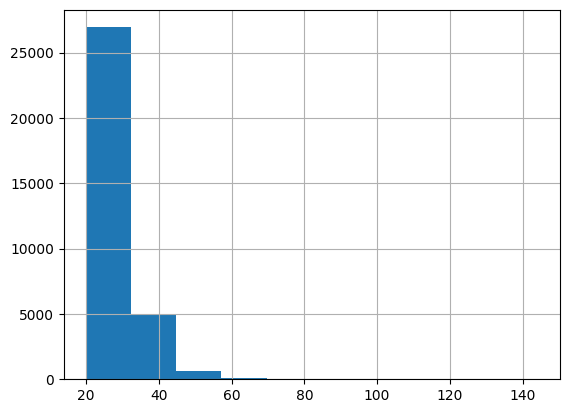

In [15]:
df['person_age'].hist()

There are a few values over 80. Let's check

Here we see the incoherents vaues: persone age 144 ? MAybe this a bank or a company??? But, if it is a company whay it borrows only 6000 ??? And why the company 123 years old asks education's loan ?? 

So we can dropp the rows where age > 100

now, we will create the categories based on age column

In [16]:
df = df.drop(df[df['person_age'] > 100].index, axis=0)
df['age_catego'] = pd.cut(df['person_age'],
                           bins=[18, 30, 40, 50, 60, 100],
                           labels=['20-30', '31-40', '41-50', '51-60', '60+'])
df['age_catego'] = df['age_catego'].astype('object')
df = df.drop('person_age', axis = 1)
df

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_catego
0,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-30
1,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-30
2,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-30
3,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-30
4,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,51-60
32577,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,51-60
32578,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,60+
32579,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,51-60


In [17]:
df = df.drop(df[df['person_emp_length'] > 60].index, axis=0)
df

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_catego
1,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-30
2,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-30
3,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-30
4,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-30
5,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,51-60
32577,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,51-60
32578,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,60+
32579,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,51-60


In [18]:
quantitatif_columns = df.drop('loan_status', axis=1)
for col in quantitatif_columns.select_dtypes('object'):
    quantitatif_columns = quantitatif_columns.drop(col, axis=1)
quantitatif_columns.head()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
1,9600,5.0,1000,11.14,0.10,2
2,9600,1.0,5500,12.87,0.57,3
3,65500,4.0,35000,15.23,0.53,2
4,54400,8.0,35000,14.27,0.55,4
5,9900,2.0,2500,7.14,0.25,2


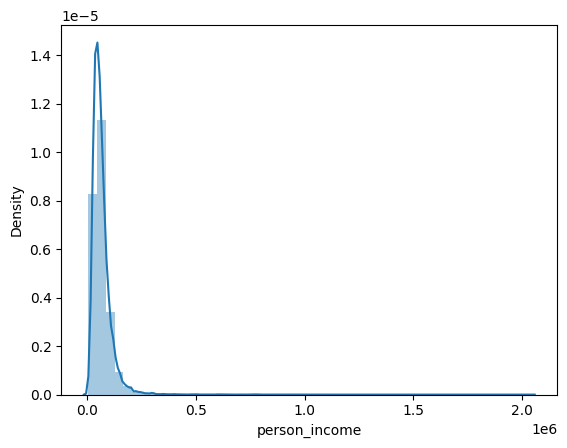

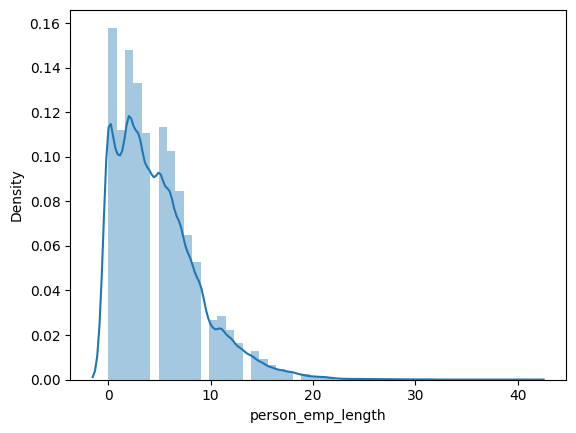

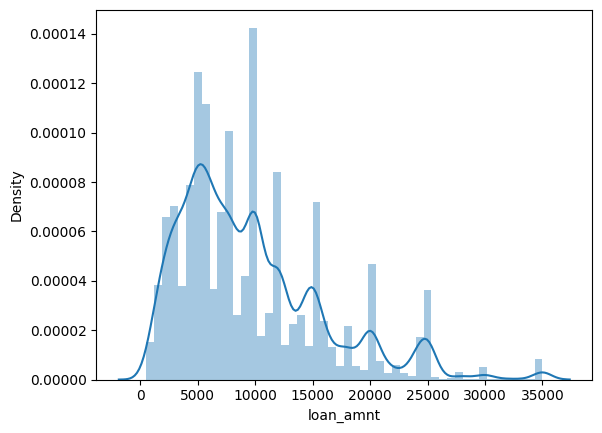

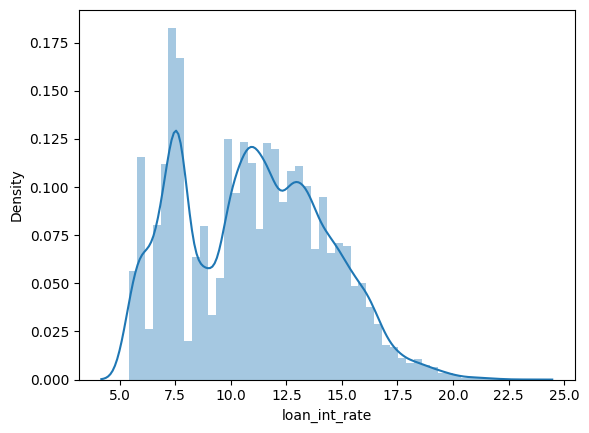

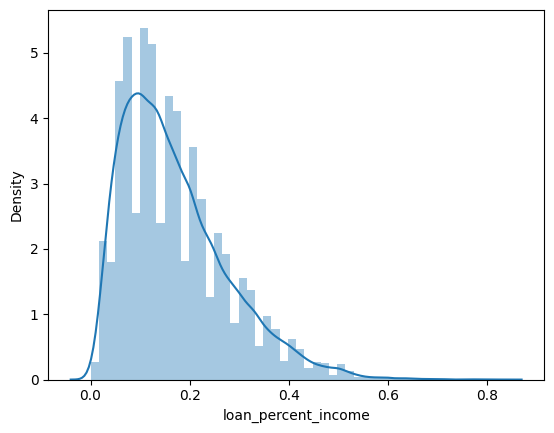

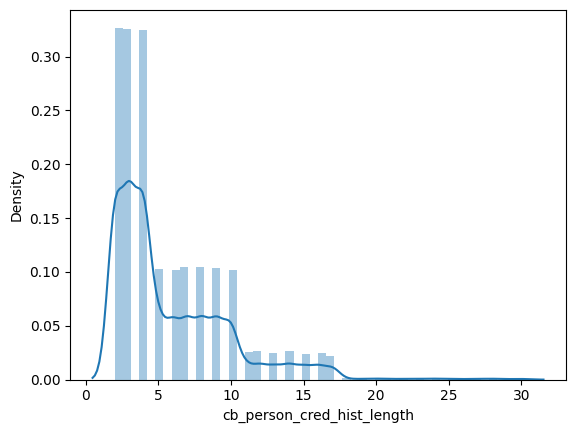

In [19]:
for col in quantitatif_columns:
    plt.figure()
    sns.distplot(df[col])

#### Analyse des variables ayant le type object

In [20]:
for col in df.select_dtypes('object'):
    print(f'{col :-<60} {df[col].unique()}')

person_home_ownership--------------------------------------- ['OWN' 'MORTGAGE' 'RENT' 'OTHER']
loan_intent------------------------------------------------- ['EDUCATION' 'MEDICAL' 'VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade-------------------------------------------------- ['B' 'C' 'A' 'D' 'E' 'F' 'G']
cb_person_default_on_file----------------------------------- ['N' 'Y']
age_catego-------------------------------------------------- ['20-30' '31-40' '41-50' '51-60' '60+']


In [21]:
qualitatif_columns = df.drop('loan_status',axis=1).select_dtypes('object')
qualitatif_columns

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,age_catego
1,OWN,EDUCATION,B,N,20-30
2,MORTGAGE,MEDICAL,C,N,20-30
3,RENT,MEDICAL,C,N,20-30
4,RENT,MEDICAL,C,Y,20-30
5,OWN,VENTURE,A,N,20-30
...,...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N,51-60
32577,MORTGAGE,PERSONAL,A,N,51-60
32578,RENT,HOMEIMPROVEMENT,B,N,60+
32579,MORTGAGE,PERSONAL,B,N,51-60


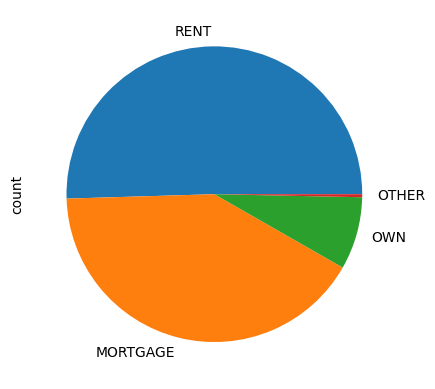

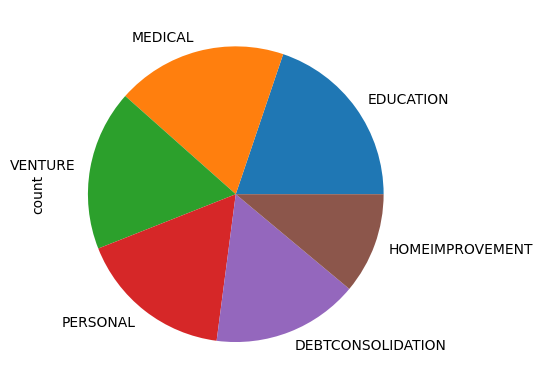

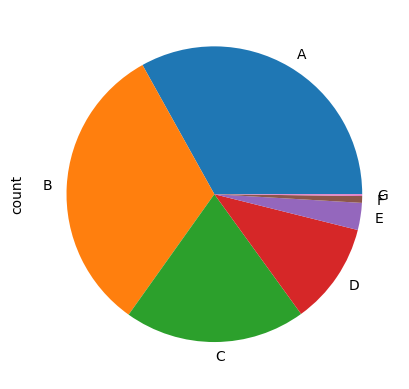

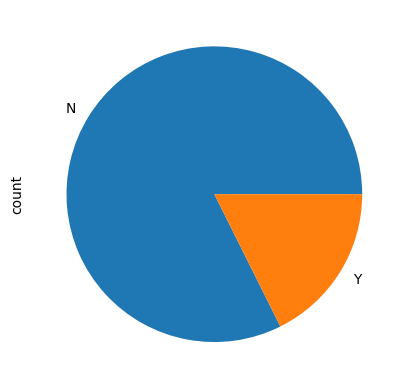

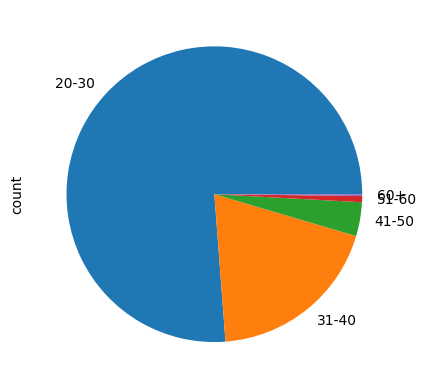

In [22]:
for col in qualitatif_columns:
    plt.figure()
    df[col].value_counts().plot.pie()

### Relation Target/quantitative variables

In [23]:
positive_df = df[df['loan_status'] == 1]
negative_df = df[df['loan_status']== 0]

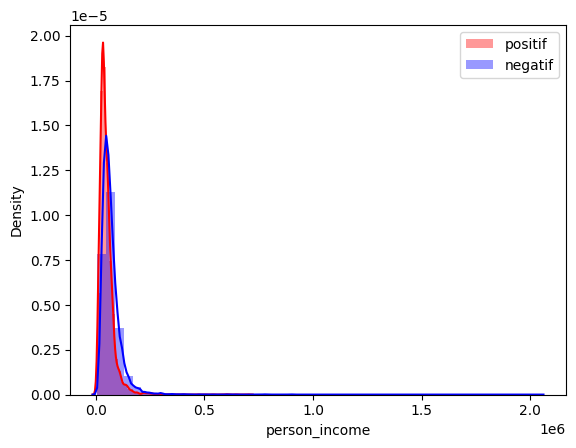

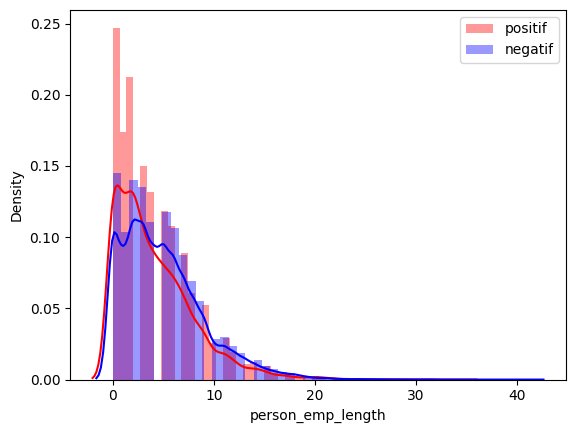

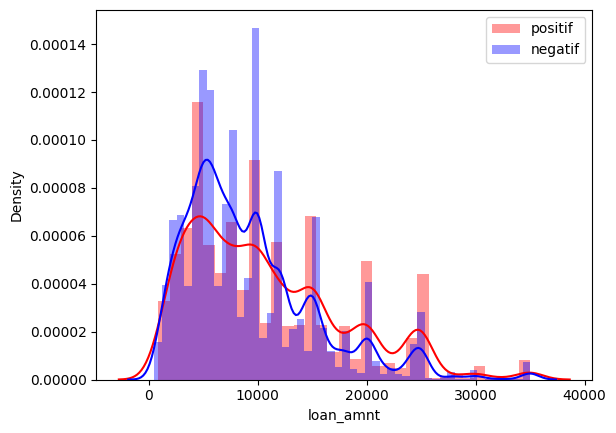

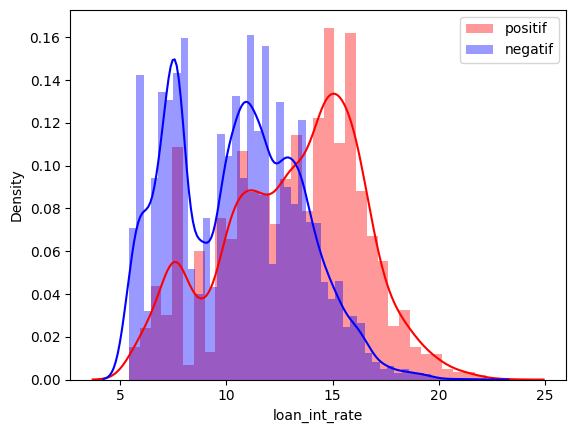

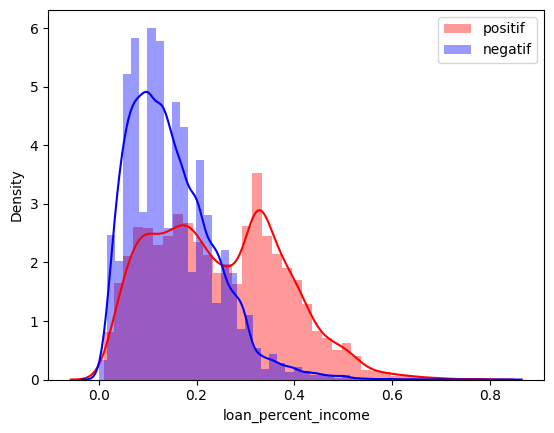

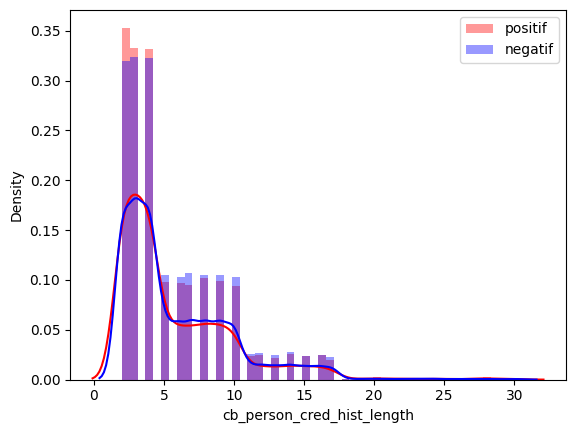

In [24]:
for col in quantitatif_columns:
    plt.figure()
    sns.distplot(positive_df[col], label = 'positif', color='red')
    sns.distplot(negative_df[col], label = 'negatif', color = 'blue')    
    plt.legend()

<Axes: xlabel='age_catego', ylabel='count'>

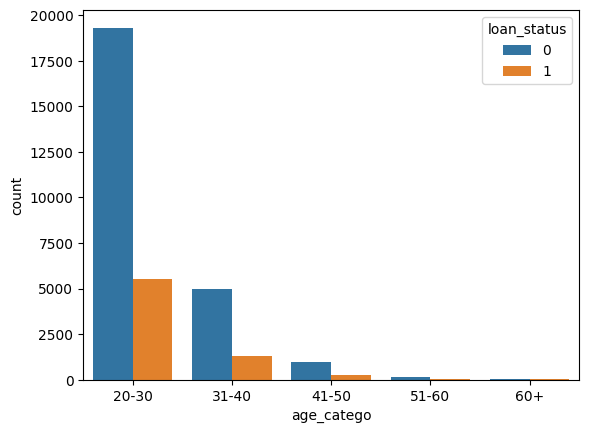

In [25]:
sns.countplot(x = 'age_catego', hue = 'loan_status', data = df)

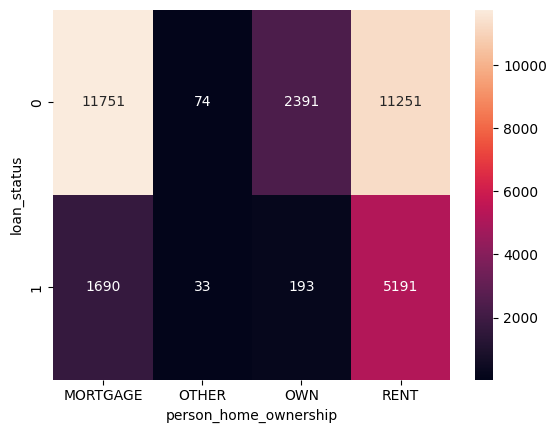

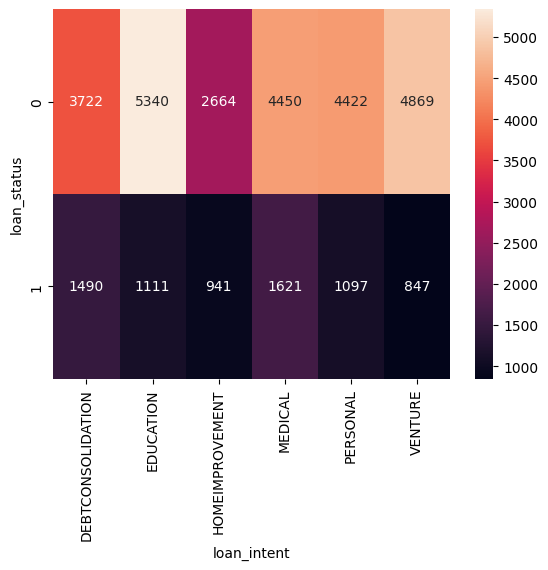

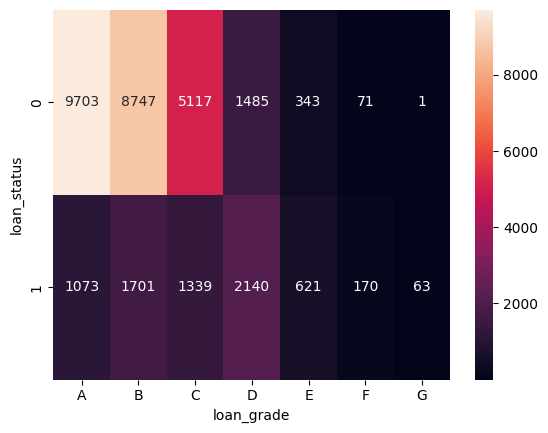

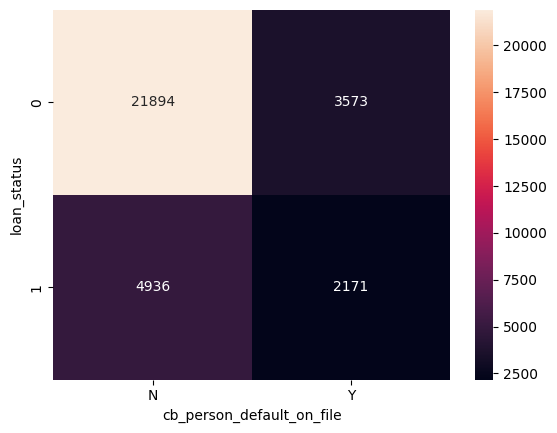

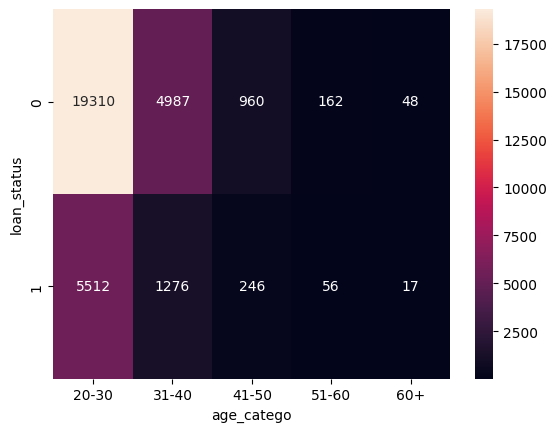

In [26]:
for col in qualitatif_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['loan_status'], df[col]), annot=True, fmt = 'd')

Relation between variables expliquatives : 

<Axes: >

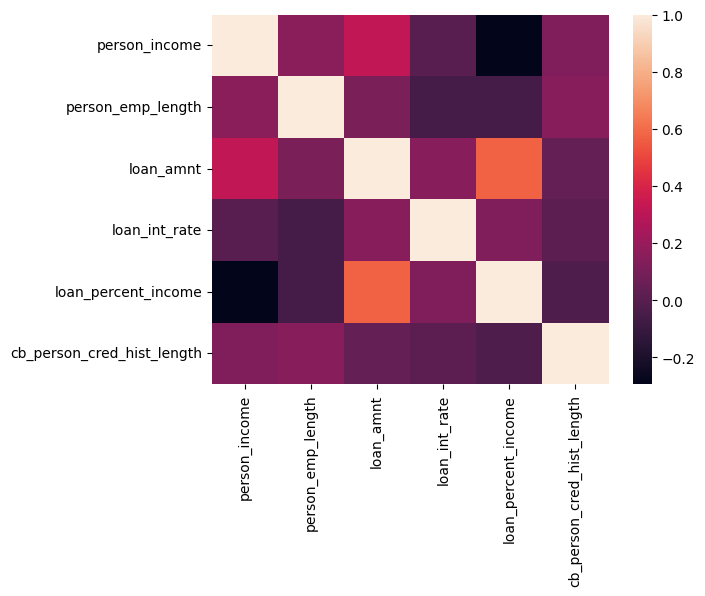

In [27]:
sns.heatmap(quantitatif_columns.corr())

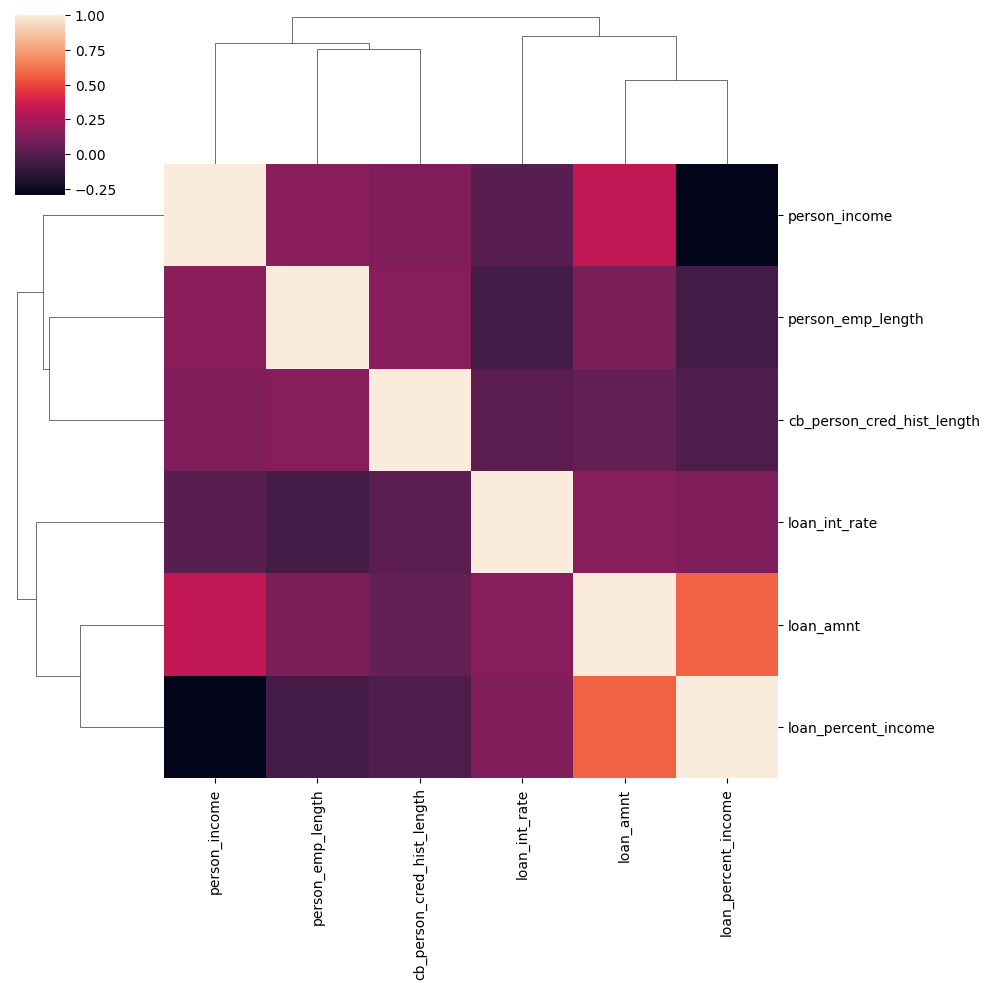

In [28]:
sns.clustermap(quantitatif_columns.corr())

<Figure size 640x480 with 0 Axes>

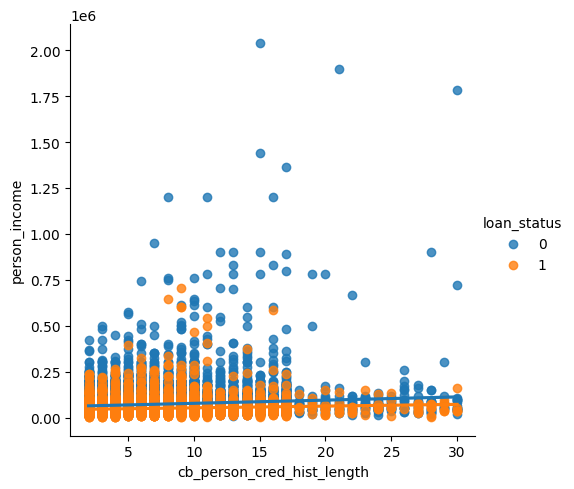

<Figure size 640x480 with 0 Axes>

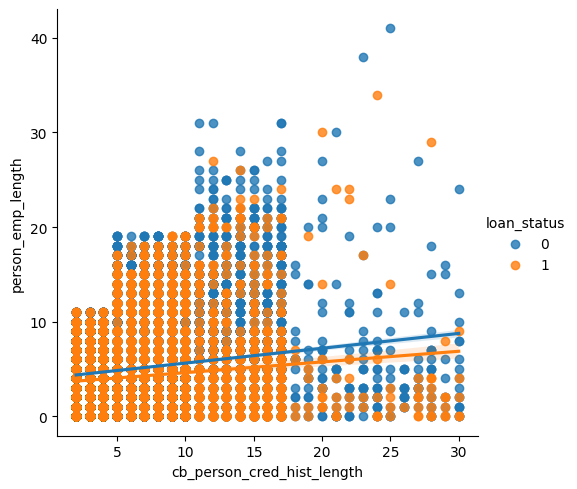

<Figure size 640x480 with 0 Axes>

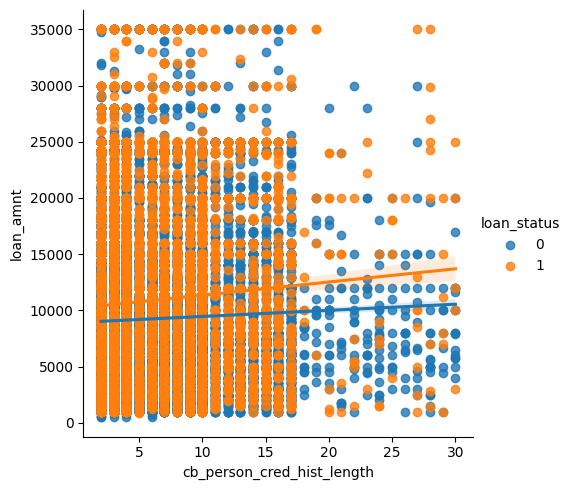

<Figure size 640x480 with 0 Axes>

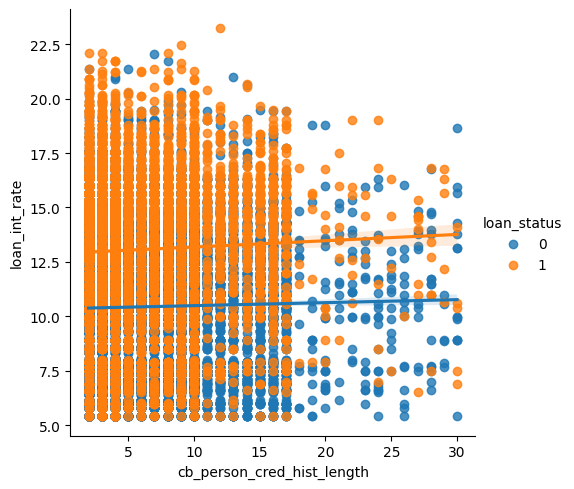

<Figure size 640x480 with 0 Axes>

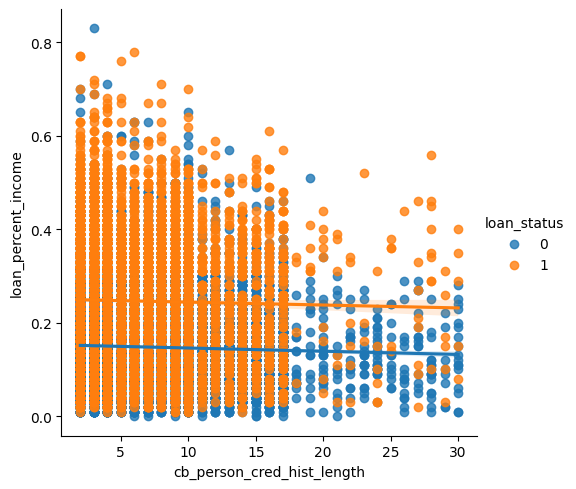

<Figure size 640x480 with 0 Axes>

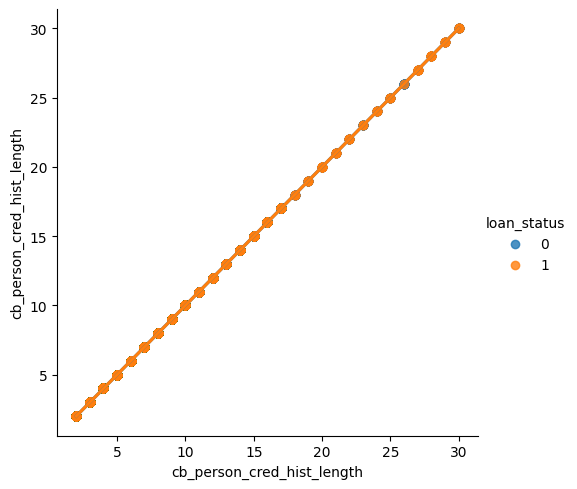

In [29]:
for col in quantitatif_columns:
    plt.figure()
    sns.lmplot(x= 'cb_person_cred_hist_length', y = col, hue = 'loan_status', data = df)

### Hyphothese nulle

##### T-Test


#### hypotheses nulle (H0):

H0: The mean rates are EQUAL between positive and negative individuals.
The Student's t-test will verify if the means of the two distributions (positive and negative) are significantly different. If we reject H0, we conclude that the means between the two distributions are different.

If alpha < p-value, then we reject H0

In [30]:
from scipy.stats import ttest_ind

In [31]:
df.shape

(32574, 12)

In [32]:
positive_df.shape

(7107, 12)

In [33]:
negative_df.shape

(25467, 12)

In [34]:
negative_df.sample(7108) 
# burda au hasard 7108 valeurs secirik. 7108 niye? cunki positifde cemi bu qeder valeur var
# buna deyirler déchantillonage

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_catego
20975,45000,MORTGAGE,12.0,DEBTCONSOLIDATION,C,12250,14.27,0,0.27,Y,10,31-40
2384,32000,MORTGAGE,4.0,EDUCATION,A,4900,5.99,0,0.15,N,3,20-30
24361,48000,RENT,0.0,EDUCATION,B,10000,10.08,0,0.21,N,6,20-30
21896,76000,RENT,4.0,MEDICAL,B,6000,NaN,0,0.08,N,10,31-40
2326,28500,RENT,3.0,DEBTCONSOLIDATION,B,2500,11.36,0,0.09,N,4,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...
25857,91000,MORTGAGE,2.0,HOMEIMPROVEMENT,A,3000,5.99,0,0.03,N,8,20-30
28517,75000,RENT,2.0,EDUCATION,A,14000,9.63,0,0.19,N,5,20-30
31599,110000,MORTGAGE,11.0,HOMEIMPROVEMENT,A,12000,7.88,0,0.11,N,16,31-40
26049,95000,MORTGAGE,0.0,DEBTCONSOLIDATION,A,18000,7.88,0,0.19,N,10,20-30


In [35]:
balanced_neg = negative_df.sample(positive_df.shape[0])

In [36]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_neg[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'H0 rejetée'
    else :
        return 0
# dropna() edirik ki, ordaki Nan lari ataq, cunki onlarin rolu yoxdur signif olub olmamaqda

In [37]:
for col in quantitatif_columns:
    print(f'{col :-<50} {t_test(col)}')

person_income------------------------------------- H0 rejetée
person_emp_length--------------------------------- H0 rejetée
loan_amnt----------------------------------------- H0 rejetée
loan_int_rate------------------------------------- H0 rejetée
loan_percent_income------------------------------- H0 rejetée
cb_person_cred_hist_length------------------------ 0


So, we observe that individuals with a positive outcome (1) have significantly different distributions for quantitative variables (except for cb_person_cred_hist).

This means that the distributions for these variables are different when the target is y=0 (no default) and when the target is y=1 (default).

In [38]:
quantitatif_columns.corr()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
person_income,1.000000,0.154746,0.317497,-0.001121,-0.294558,0.123049
person_emp_length,0.154746,1.000000,0.110993,-0.058263,-0.058559,0.149404
loan_amnt,0.317497,0.110993,1.000000,0.146803,0.572420,0.042240
loan_int_rate,-0.001121,-0.058263,0.146803,1.000000,0.120218,0.016656
loan_percent_income,-0.294558,-0.058559,0.572420,0.120218,1.000000,-0.031447
cb_person_cred_hist_length,0.123049,0.149404,0.042240,0.016656,-0.031447,1.000000
